In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.5 MB/s eta 0:00:00


In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs  # Import DataStructs for TanimotoSimilarity

# Define two molecules as SMILES strings
molecule1_smiles = "COC1=CC=C(C=C1NC(=O)CC1=CSC(=N1)C1=CSC=C1)S(=O)(=O)N1CCCCCC1"  # Replace with your first molecule's SMILES string
molecule2_smiles = "COC1=C(C=C(C=C1)C(=O)NCCC2=CC=CC=C2)S(=O)(=O)NCC3=CC=CC=C3"  # Replace with your second molecule's SMILES string

# Convert SMILES strings to RDKit molecules
molecule1 = Chem.MolFromSmiles(molecule1_smiles)
molecule2 = Chem.MolFromSmiles(molecule2_smiles)

# Check if molecules are valid
if molecule1 is None or molecule2 is None:
    raise ValueError("One or both of the input molecules are invalid.")

# Calculate molecular fingerprints
fp1 = MACCSkeys.GenMACCSKeys(molecule1)
fp2 = MACCSkeys.GenMACCSKeys(molecule2)


# Calculate molecular descriptors (optional)
logP1 = Descriptors.MolLogP(molecule1)
logP2 = Descriptors.MolLogP(molecule2)
mw1 = Descriptors.MolWt(molecule1)
mw2 = Descriptors.MolWt(molecule2)

# Calculate Lipinski's Rule of Five properties
hbd1 = Descriptors.NumHDonors(molecule1)
hbd2 = Descriptors.NumHDonors(molecule2)
hba1 = Descriptors.NumHAcceptors(molecule1)
hba2 = Descriptors.NumHAcceptors(molecule2)

# Print the results
print(f"Molecular properties for molecule 1 - LogP: {logP1}, Molecular Weight: {mw1}")
print(f"Molecular properties for molecule 2 - LogP: {logP2}, Molecular Weight: {mw2}")
print(f"Lipinski's Rule of Five properties for molecule 1 - HBD: {hbd1}, HBA: {hba1}")
print(f"Lipinski's Rule of Five properties for molecule 2 - HBD: {hbd2}, HBA: {hba2}")


Molecular properties for molecule 1 - LogP: 4.626100000000004, Molecular Weight: 491.6600000000003
Molecular properties for molecule 2 - LogP: 3.146200000000001, Molecular Weight: 424.5220000000001
Lipinski's Rule of Five properties for molecule 1 - HBD: 1, HBA: 7
Lipinski's Rule of Five properties for molecule 2 - HBD: 2, HBA: 4


# Display Similar Sub Structures


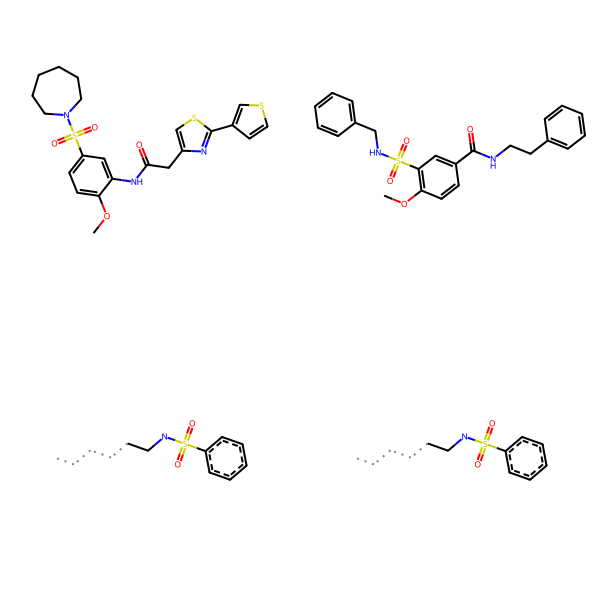

Similarity: 0.20


In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from IPython.display import display

def find_common_substructure(molecule1, molecule2):
    # Convert SMILES strings to RDKit molecules
    mol1 = Chem.MolFromSmiles(molecule1)
    mol2 = Chem.MolFromSmiles(molecule2)

    # Generate Morgan fingerprints for the molecules
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)

    # Compute the similarity between fingerprints
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

    # Find the maximum common substructure (MCS)
    mcs = rdFMCS.FindMCS([mol1, mol2])

    # Get the common substructure as SMARTS
    common_substructure_smarts = mcs.smartsString

    # Highlight the common substructure in the molecules
    mol1_highlighted = Chem.MolFromSmarts(common_substructure_smarts)
    mol2_highlighted = Chem.MolFromSmarts(common_substructure_smarts)

    # Draw the structures
    img = Draw.MolsToGridImage([mol1, mol2, mol1_highlighted, mol2_highlighted], molsPerRow=2, subImgSize=(300, 300))

    # Display the image using IPython.display
    display(img)

    return similarity

# Example usage
molecule1 = "COC1=CC=C(C=C1NC(=O)CC1=CSC(=N1)C1=CSC=C1)S(=O)(=O)N1CCCCCC1"  # Ethanol
molecule2 = "COC1=C(C=C(C=C1)C(=O)NCCC2=CC=CC=C2)S(=O)(=O)NCC3=CC=CC=C3"  # Diethyl ether

similarity = find_common_substructure(molecule1, molecule2)

print(f"Similarity: {similarity:.2f}")




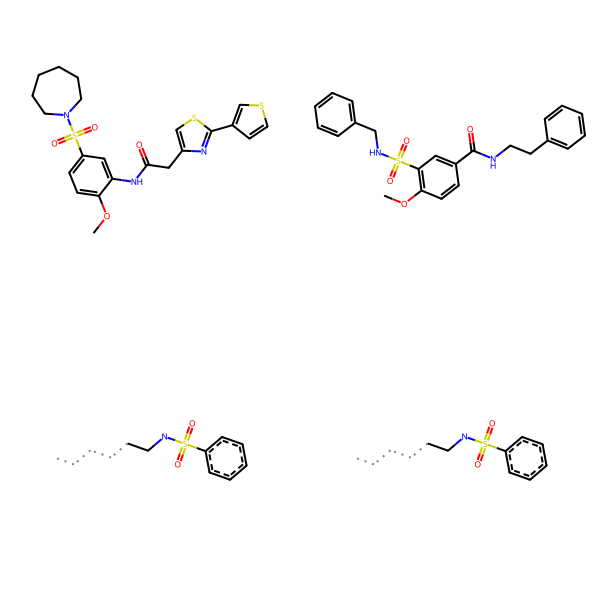

Similarity: 0.20


In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from IPython.display import display

def find_common_substructure(molecule1, molecule2, radius=2, nBits=1024):
    """Find common substructure between two molecules and visualize."""
    try:
        mol1 = Chem.MolFromSmiles(molecule1)
        mol2 = Chem.MolFromSmiles(molecule2)
        if mol1 is None or mol2 is None:
            raise ValueError("Invalid input molecules.")

        fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, radius, nBits=nBits)
        fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius, nBits=nBits)

        similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

        mcs = rdFMCS.FindMCS([mol1, mol2])
        common_substructure_smarts = mcs.smartsString

        mol1_highlighted = Chem.MolFromSmarts(common_substructure_smarts)
        mol2_highlighted = Chem.MolFromSmarts(common_substructure_smarts)

        img = Draw.MolsToGridImage([mol1, mol2, mol1_highlighted, mol2_highlighted], molsPerRow=2, subImgSize=(300, 300))
        display(img)

        return similarity
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Example usage
molecule1 = "COC1=CC=C(C=C1NC(=O)CC1=CSC(=N1)C1=CSC=C1)S(=O)(=O)N1CCCCCC1"  # Ethanol
molecule2 = "COC1=C(C=C(C=C1)C(=O)NCCC2=CC=CC=C2)S(=O)(=O)NCC3=CC=CC=C3"  # Diethyl ether

similarity = find_common_substructure(molecule1, molecule2)

if similarity is not None:
    print(f"Similarity: {similarity:.2f}")
